In [193]:
import pandas as pd
import tqdm
from tqdm import tqdm, tqdm_notebook 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Let's first understand the features. We created a file called AZDIAS_Feature_Summary.csv where we have the column and the possible values

In [194]:
feat_df = pd.read_csv('./data/AZDIAS_Feature_Summary.csv')

In [195]:
feat_df[['Attribute']] = feat_df[['Attribute']].fillna(method='ffill')

In [196]:
feat_df.sample(10)

,Attribute,Value
2116,SEMIO_KAEM,2
2060,PRAEGENDE_JUGENDJAHRE,6
1344,KBA13_FORD,0
27,ALTER_HH,16
590,D19_VERSAND_ONLINE_QUOTE_12,0
313,D19_GESAMT_ANZ_25,1
645,D19_WEIN_FEINKOST_RZ,6
706,GEBAEUDETYP_RASTER,1
1851,KBA13_VORB_1,5
116,CAMEO_DEUINTL_2026,31


### Data Exploration

In [216]:
#General population dataset
azdias = pd.read_csv('data/Udacity_AZDIAS_052018.csv', sep=';', low_memory=False)
azdias.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,2.0
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5.0,2.0,1.0
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5.0,2.0,3.0
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3.0,2.0,4.0
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4.0,1.0,3.0


In [217]:
len(set(type_lookup['attr']))

481

In [218]:
#Does the features match the feature set?
features = list(type_lookup['attr'])
azdias_feat = list(azdias.columns)
len(features),len(azdias_feat)

(481, 366)

In [219]:
cols = [ col for col in azdias_feat if col in features]
cols = ['LNR'] + cols
len(cols)

273

In [220]:
#Remove the columns from azdias that are not part of the attributes. However we keep the LNR identification code
azdias_subset = azdias[cols]
azdias_subset.head()

,LNR,AGER_TYP,ALTER_HH,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CAMEO_DEU_2015,CAMEO_DEUG_2015,...,SEMIO_VERT,SHOPPER_TYP,TITEL_KZ,VERS_TYP,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,-1.0,NaN,-1.0,NaN,NaN,NaN,3.0,1.0,2.0
1,910220,-1,0.0,11.0,0.0,2.0,0.0,6.0,8A,8,...,1.0,3.0,0.0,2.0,3.0,9.0,4.0,5.0,2.0,1.0
2,910225,-1,17.0,10.0,0.0,1.0,0.0,2.0,4C,4,...,4.0,2.0,0.0,1.0,3.0,9.0,2.0,5.0,2.0,3.0
3,910226,2,13.0,1.0,0.0,0.0,0.0,4.0,2A,2,...,4.0,1.0,0.0,1.0,NaN,9.0,7.0,3.0,2.0,4.0
4,910241,-1,20.0,3.0,0.0,4.0,0.0,2.0,6B,6,...,7.0,2.0,0.0,2.0,2.0,9.0,3.0,4.0,1.0,3.0


In [221]:
azdias_subset.describe()

,LNR,AGER_TYP,ALTER_HH,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CJT_GESAMTTYP,D19_BANKEN_ANZ_12,...,SEMIO_VERT,SHOPPER_TYP,TITEL_KZ,VERS_TYP,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,6.384000e+05,638400.000000,585268.000000,571296.000000,568610.000000,585268.000000,585268.000000,570888.000000,634886.000000,638400.000000,...,638399.000000,638399.000000,585267.000000,638399.000000,561041.000000,585267.000000,571295.000000,638399.000000,638399.000000,638399.000000
mean,6.363359e+05,-0.359095,10.867592,8.274942,0.040270,1.728922,0.004174,4.152935,3.634945,0.122556,...,4.019059,1.265317,0.003472,1.196562,3.932488,7.912491,4.050562,3.360474,1.522386,2.777243
std,2.559900e+05,1.198446,7.640901,15.588029,0.317091,1.155030,0.068980,2.182518,1.594910,0.536674,...,2.077772,1.288642,0.084419,0.954331,1.964238,1.921875,1.948764,1.352654,0.499499,1.068566
min,1.918920e+05,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,4.150045e+05,-1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,2.000000,0.000000,...,2.000000,0.000000,0.000000,1.000000,2.000000,8.000000,3.000000,3.000000,1.000000,2.000000
50%,6.326405e+05,-1.000000,13.000000,4.000000,0.000000,1.000000,0.000000,5.000000,4.000000,0.000000,...,4.000000,1.000000,0.000000,1.000000,4.000000,9.000000,3.000000,3.000000,2.000000,3.000000
75%,8.581982e+05,-1.000000,17.000000,9.000000,0.000000,2.000000,0.000000,6.000000,5.000000,0.000000,...,6.000000,2.000000,0.000000,2.000000,6.000000,9.000000,5.000000,4.000000,2.000000,4.000000
max,1.082873e+06,3.000000,21.000000,595.000000,23.000000,45.000000,6.000000,7.000000,6.000000,6.000000,...,7.000000,3.000000,5.000000,2.000000,6.000000,9.000000,8.000000,6.000000,2.000000,9.000000


In [222]:
azdias_subset.shape

(638400, 273)

In [223]:
#figure out the nan per column
nans = azdias_subset.isna().sum().sort_values()

In [224]:
nans_df = pd.DataFrame()
nans_df['attr'] = list(nans.index)
nans_df['nan_count'] = list(nans.values)

In [225]:
len_df = azdias_subset.shape[0]
nans_df['pct_nan'] = [float(count)/len_df for count in nans_df['nan_count']]
nans_df.head()

,attr,nan_count,pct_nan
0,LNR,0,0.0
1,D19_VERSAND_ANZ_24,0,0.0
2,D19_VERSAND_ANZ_12,0,0.0
3,D19_TELKO_ONLINE_DATUM,0,0.0
4,D19_TELKO_OFFLINE_DATUM,0,0.0


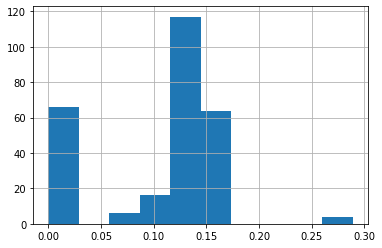

In [226]:
nans_df['pct_nan'].hist()

In [227]:
nans_df = pd.merge(nans_df,type_lookup, on=['attr'])
nans_df.head()

,attr,nan_count,pct_nan,datatype
0,D19_VERSAND_ANZ_24,0,0.0,numerical
1,D19_VERSAND_ANZ_12,0,0.0,numerical
2,D19_TELKO_ONLINE_DATUM,0,0.0,numerical
3,D19_TELKO_OFFLINE_DATUM,0,0.0,numerical
4,D19_TELKO_DATUM,0,0.0,numerical


In [228]:
nans_df['datatype'].value_counts()

numerical      270
categorical      2
Name: datatype, dtype: int64

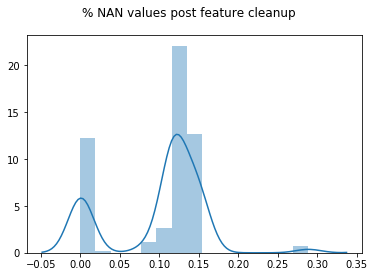

In [229]:
import seaborn as sns
nums = nans_df[nans_df['datatype']=='numerical']['pct_nan']
sns.distplot([nums])
plt.suptitle('% NAN values post feature cleanup');
plt.savefig('assets/NAN_values_feat_cleanup.png')

In [230]:
nans_df[nans_df['datatype']=='categorical']

,attr,nan_count,pct_nan,datatype
74,OST_WEST_KZ,67105,0.105114,categorical
85,CAMEO_DEU_2015,71216,0.111554,categorical


Most of the numerical and categorical values are are under 15% NAN. We now need to check how many of them are not within the attributes given values

In [231]:
# cat_col = ['OST_WEST_KZ','CAMEO_DEU_2015']

In [232]:
# out_feat = pd.DataFrame()
# attr_list = []
# unknown_count = []
# num_col = [ col for col in cols if col not in cat_col]

# for col in tqdm(num_col):
    
#     possible_values = feat_df[feat_df['Attribute'] == col]['Value']
#     for val is possible_values:
#     azdias_subset[col] = [value if value in possible_values else 99 for value in azdias_subset[col]]
#     count = 0
#     attr_list.append(col)


In [233]:
# out_feat = pd.DataFrame()
# attr_list = []
# unknown_count = []

# out_feat['attr'] = list(azdias_subset.columns)

# for attr in out_feat['attr']:
#     try:
#         attr_list.append(attr)
#         unknown_count.append(azdias_subset[attr].count(99))
#     except:
#         attr_list.append(attr)
#         unknown_count.append(0)
#         continue

# out_feat['unknown_count'] = unknown_count

In [234]:
# #Lets check the two categorical variables

# for col in tqdm(cat_col):
    
#     possible_values = feat_df[feat_df['Attribute'] == col]['Value']
#     azdias_subset[col] = [value if value in possible_values else 'Unknown' for value in azdias_subset[col]]
#     count = 0
#     attr_list.append(col)

# for attr in cat_col:
#     try:
#         attr_list.append(attr)
#         unknown_count.append(azdias_subset[attr].count(99))
#     except:
#         attr_list.append(attr)
#         unknown_count.append(0)
#         continue

In [235]:
# out_feat['unknown_count'].value_counts()

The are the no attribute values that are outside of the attribute value set! Lets export a clean_azdias_subset.csv

In [236]:
azdias_subset.to_csv('./data/clean_azdias_subset.csv',index=False)

In [237]:
azdias_subset = pd.read_csv('./data/clean_azdias_subset.csv')

In [238]:
azdias_subset.head()

,LNR,AGER_TYP,ALTER_HH,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CAMEO_DEU_2015,CAMEO_DEUG_2015,...,SEMIO_VERT,SHOPPER_TYP,TITEL_KZ,VERS_TYP,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,-1.0,NaN,-1.0,NaN,NaN,NaN,3.0,1.0,2.0
1,910220,-1,0.0,11.0,0.0,2.0,0.0,6.0,8A,8,...,1.0,3.0,0.0,2.0,3.0,9.0,4.0,5.0,2.0,1.0
2,910225,-1,17.0,10.0,0.0,1.0,0.0,2.0,4C,4,...,4.0,2.0,0.0,1.0,3.0,9.0,2.0,5.0,2.0,3.0
3,910226,2,13.0,1.0,0.0,0.0,0.0,4.0,2A,2,...,4.0,1.0,0.0,1.0,NaN,9.0,7.0,3.0,2.0,4.0
4,910241,-1,20.0,3.0,0.0,4.0,0.0,2.0,6B,6,...,7.0,2.0,0.0,2.0,2.0,9.0,3.0,4.0,1.0,3.0


In [240]:
azdias_subset['MIN_GEBAEUDEJAHR']

0            NaN
1         1992.0
2         1992.0
3         1997.0
4         1992.0
5         1992.0
6         1992.0
7         1992.0
8         1992.0
9         1992.0
10        1992.0
11           NaN
12        2005.0
13        2009.0
14           NaN
15        1992.0
16        1994.0
17           NaN
18        1996.0
19        1992.0
20        2002.0
21        1992.0
22        1992.0
23        1992.0
24           NaN
25        1992.0
26        2015.0
27        1994.0
28        1992.0
29        1994.0
           ...  
638370    2005.0
638371    1995.0
638372    1992.0
638373    1992.0
638374    1994.0
638375    1992.0
638376    1992.0
638377    1992.0
638378    1992.0
638379    1993.0
638380    1993.0
638381    1991.0
638382    1992.0
638383    1994.0
638384    1996.0
638385    1992.0
638386    1992.0
638387    1992.0
638388    1992.0
638389    1992.0
638390    1993.0
638391    1992.0
638392    1992.0
638393    1992.0
638394    1992.0
638395    1992.0
638396    1992.0
638397    1992